<h1 align="center">MSIN0097: Predictive Analytics</h1>
<h1 align="center">Individual Coursework</h1>
<h1 align="center">Predicting Diamond Prices</h1>
<br><br><br>

 <h3 align="center">March 2021</h3>






<h3>Table of Contents</h3>

* [1. Introduction](#1.-Introduction)
    * [1.1 Business Problem](#1.1-Business-Problem)
    * [1.2 Objective](#1.2-Objective)
* [2. Exploratory Analysis](#2.-Exploratory-Analysis)
    * [2.1 Exploring the Dataset](#2.1-Exploring-the-Dataset)
    * [2.2 Variable Description](#2.2-Variable-Description)
* [3. Data Visualization](#3.-Data-Visualization)
    * [3.1 Scatter Plot](#3.1-Scatter-Plot)
    * [3.2 Box-Plots](#3.2-Box-Plots)
    * [3.3 Countplot](#3.3-Countplot)
    * [3.4 Distribution Plots](#3.4-Distribution-Plots)
* [4. Data Cleaning & Preparation](#4.-Data-Cleaning-&-Preparation)
    * [4.1 Dropping Columns](#4.1-Dropping-Columns)
    * [4.2 Converting Categorical Features to Numbers: One - Hot Encoding](#4.2-Converting-Categorical-Features-to-Numbers-:-One-Hot-Encoding)
    * [4.3 Generating Target Dataset](#4.3-Generating-Target-Dataset)
    * [4.4 Converting "price" column to logarithmic scale](#4.4-Converting-"price"-column-to-logarithmic-scale)
    * [4.5 Normalizing Numerical Data](#4.5-Normalizing-Numerical-Data)
    * [4.6 Train, Cross-Validation & Test split](#4.6-Train,-Cross-Validation-&-Test-split)
* [5. Modelling - Machine Learning Models](#5.-Modelling-Machine-Learning-Models)
    * [5.1 Lasso Regression](#5.1-Lasso-Regression)
    * [5.2 Random Forest Regression](#5.2-Random-Forest-Regression)
    * [5.3 Support Vector Machine Regression (SVR)](#5.3-Support-Vector-Machine-Regression-(SVR))
    * [5.4 Gradient Tree Boosting](#5.4-Gradient-Tree-Boosting)
    * [5.5 Artificial Neural Network (ANN)](#5.5-Artificial-Neural-Network-(ANN))
* [6. Fine Tuning](#6.-Fine-Tuning)
    * [6.1 Random Forest Regression](#6.1-Random-Forest-Regression)
    * [6.2 Gradient Tree Boosting](#6.1-Gradient-Tree-Boosting)
* [7. Conclusion](#7.-Conclusion)
    * [7.1 Limitations](#7.1-Limitations)
* [8. References](#References)

# 1. Introduction

## 1.1 Business Problem

The diamond industry has been facing various challenges throughout the last decade. Retail demand has been flactuating over the past few years. A recession in the field is expected for at least 2 more years. While the situation remains uncertain, institutions dealing with valuable stones have been facing challenges with regards to the added values that they can accommodate to consumers. 

Throughout the diamond value chain, occasionally uncontrollable uncertainties may arise with regards to the pricing that can be implemented to valuable stones. Finally, the creation of real and authentic lab made diamonds being available to the consumers at far lower prices was another major hit to the traditional diamond industry.
 
As a measure, diamonds possess various physical characteristics that can determine their objective value. Factors such as clarity, "cut", "color" and others are vital to determining their price. In this analysis we will be trying to produce a price prediction model that can determine the objective value of diamonds based on the implications of their physical characteristics. The data that will be used only refer to physical diamonds deriving from excavations 

## 1.2 Objective

The goal of the research is to: 
* Produce and optimise a prediction model that can determine the price of diamonds based on their physical characteristics.


# 2. Exploratory Analysis

The dataset whick will be used for this analysis is derived from the database of Kaggle (https://www.kaggle.com/shivam2503/diamonds).

The dataset provides us with data corresponding to the various physical characteristics of diamonds. The dataset is relatively clean. Despite that small tasks need to be done in order to use the data in various models.  

## Important Notice

**Please run the following five lines of code, to install the necessary packages in order to be able to run some of the showcased models. After running them please restart the Kernel and go straight to importing the necessary packages.**

In [1]:
conda install -c conda-forge xgboost

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - xgboost


The following packages will be SUPERSEDED by a higher-priority channel:

  conda              pkgs/main::conda-4.10.1-py38hecd8cb5_1 --> conda-forge::conda-4.10.1-py38h50d1736_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [2]:
conda install -c anaconda py-xgboost

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - py-xgboost


The following packages will be UPDATED:

  conda              conda-forge::conda-4.10.1-py38h50d173~ --> pkgs/main::conda-4.10.1-py38hecd8cb5_1


Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn --upgrade

Requirement already up-to-date: seaborn in /opt/anaconda3/lib/python3.8/site-packages (0.11.1)
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install Keras

Note: you may need to restart the kernel to use updated packages.


In [6]:
#Importing all necessary packages
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np 
import pandas as pd 
import xgboost as xgb

import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from tqdm import tqdm
import statsmodels.api as sm
from keras.layers import Input, Dense, Concatenate
from keras.models import Model

from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
import sklearn.tree as tree
import sklearn.ensemble as ensemble

from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor 
from sklearn.svm import SVR

## 2.1 Exploring the Dataset 

In [7]:
# diamond dataset
# load dataset
# create dataframe
diamonds = pd.read_csv("diamonds.csv")

# first glance at dataset
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
# show list of variables, number of observations per variable and datatype of each variable 
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


## 2.2 Variable Description

* Unnamed: 0: Acts as a Label

* Carat: Carat weight of the diamond (0.2 -- 5.01)

* Cut: Quality of the cut (Fair, Good, Very Good, Premium, Ideal)

* Color: Diamond colour, from J (worst) to D (best)  

* Clarity: A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)) 

* Depth: Total depth percentage = 2 * z / (x + y) (43 -- 79)    

* Table: Width of top of diamond relative to widest point (43 -- 95)     

* Price: Price in US dollars (326 -- 18,823) 

* x: Length in mm (0 -- 10.74)

* y: Length in mm (0 -- 58.9)

* z: Length in mm (0 -- 31.8)

In [9]:
# exploring various aspects of the data
diamonds.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# 3. Data Visualization

## 3.1 Scatter Plot 

By utilizing scatterplot we can identify indications with regards to the relationships between variables

### Price - Carat 

The following scatter plot showcases probably a linear positive relationship between the variables of price and carat.

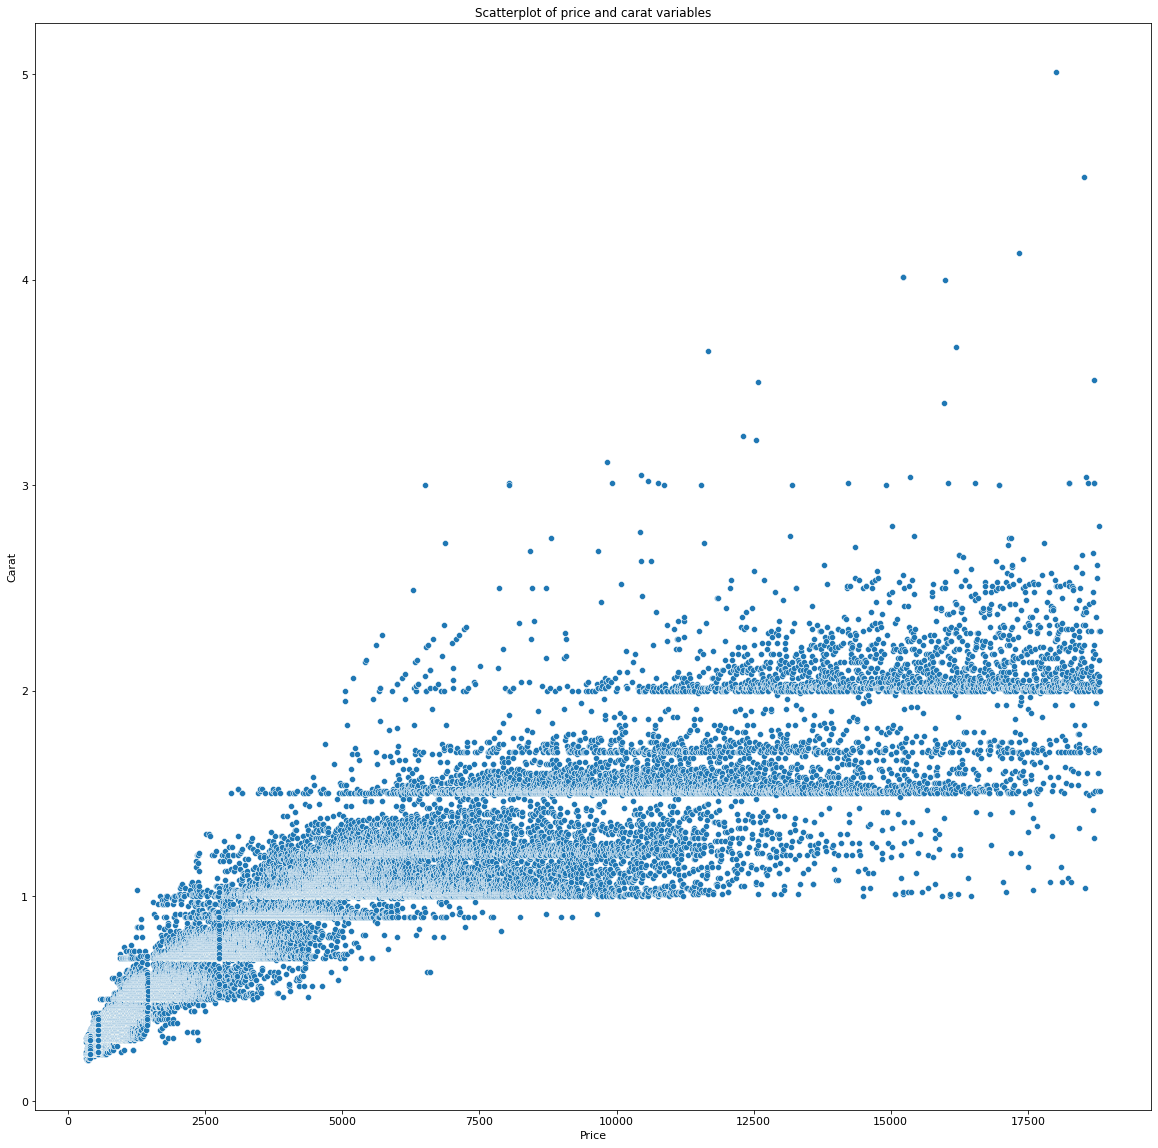

In [10]:
# scattter plot of price and carat observations relaionship
# stating the size of the plot
fig_dims = (20,20)
fig, ax = plt.subplots(figsize=fig_dims)

# generating the scatterplot
a = sns.scatterplot(data=diamonds, x="price",
                y="carat")

# setting up its labels
a.axes.set_title("Scatterplot of price and carat variables",fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
a.set_ylabel("Carat",fontsize=11)
a.set_xlabel("Price",fontsize=11);

## 3.2 Box - Plots

By using boxplots, we can see how well distributed the data in a dataset is. Featured also are the outlier values that are divided into maximum or minimum based on their position on the graph.

### Price - Color

In the following illustration, we can see that the 'J' color has the highest median price and the 'E' color has the lowest median price. In all cases there are maximum outlier values.

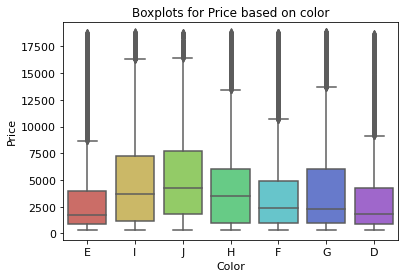

In [11]:
# boxplots for price based on color
a = sns.boxplot(y='price', x='color', 
                 data=diamonds, 
                 palette=sns.color_palette("hls", 8))
a.axes.set_title("Boxplots for Price based on color",fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
a.set_ylabel("Price",fontsize=11)
a.set_xlabel("Color",fontsize=11);

### Price - Cut

In the following illustration, we can see that the 'Premium' cut has the highest median price and the 'Ideal' cut has the lowest median price. In all cases there are maximum outlier values.

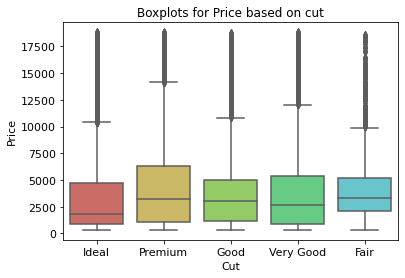

In [12]:
# boxplots for price based on cut
a = sns.boxplot(y='price', x='cut', 
                 data=diamonds, 
                 palette=sns.color_palette("hls", 8))
a.axes.set_title("Boxplots for Price based on cut",fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
a.set_ylabel("Price",fontsize=11)
a.set_xlabel("Cut",fontsize=11);

### Price - Clarity

In the following illustration, we can see that the 'VS1' clarity has the highest median price and the 'VVS1' cut has the lowest median price. In all cases there are maximum outlier values.

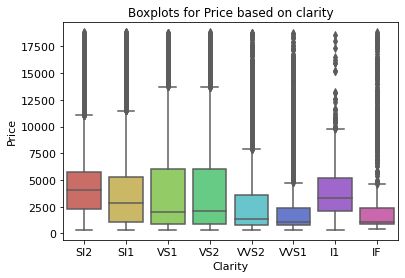

In [13]:
# boxplots for price based on clarity
a = sns.boxplot(y='price', x='clarity', 
                 data=diamonds, 
                 palette=sns.color_palette("hls", 8))
a.axes.set_title("Boxplots for Price based on clarity",fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
a.set_ylabel("Price",fontsize=11)
a.set_xlabel("Clarity",fontsize=11);

## 3.3 Countplot

A countplot is considered as a"histogram" across a categorical.

### Cut - Color

It is evident that the Ideal category has more observations than any other category.

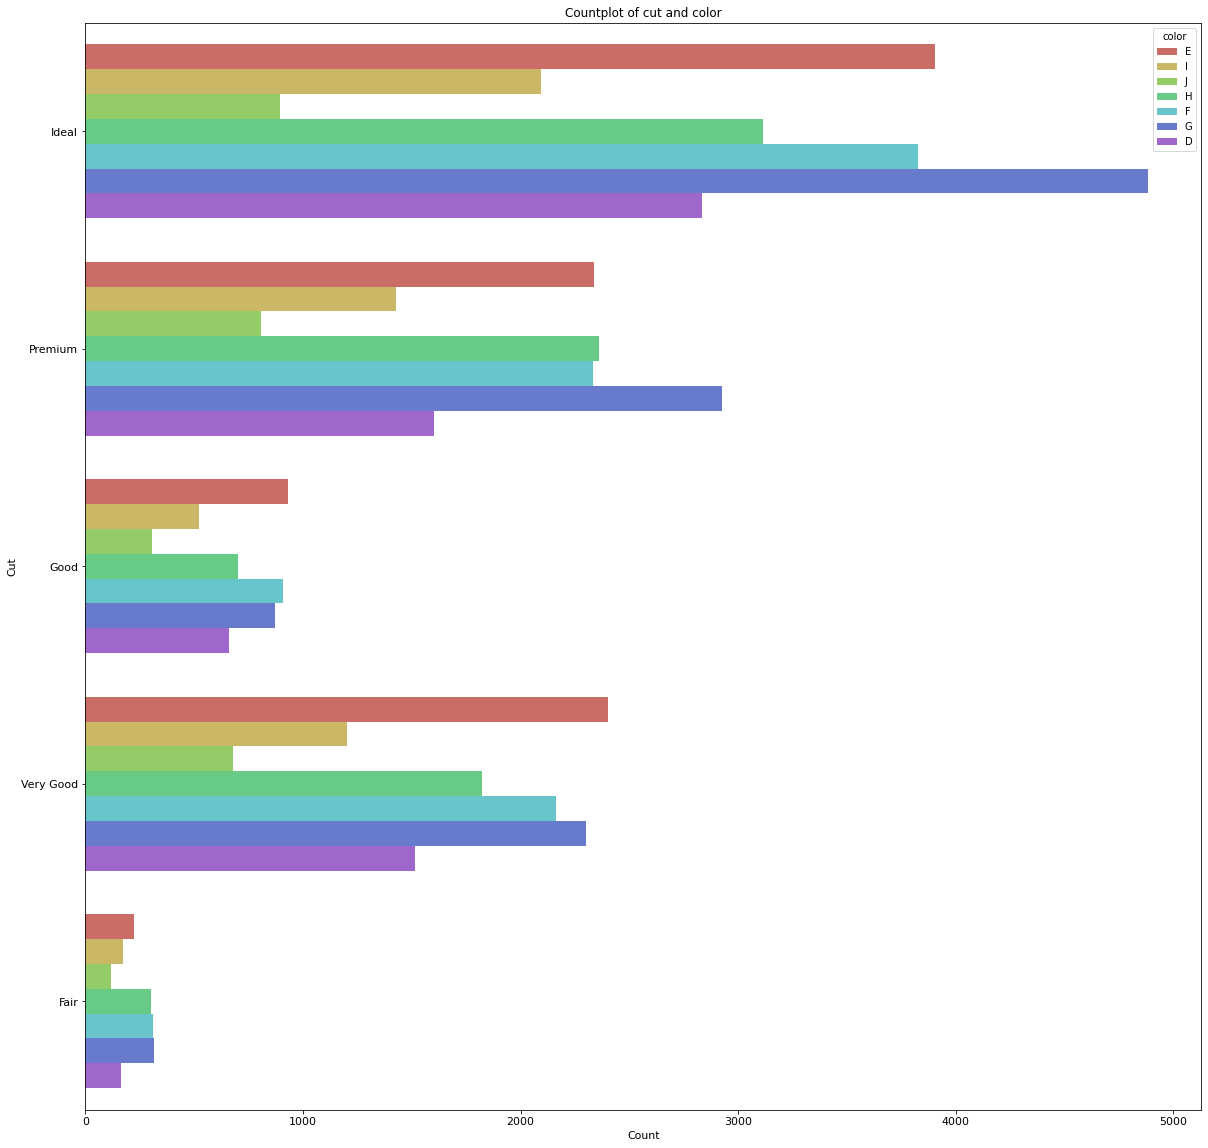

In [14]:
fig_dims = (20,20)
fig, ax = plt.subplots(figsize=fig_dims) 
a = sns.countplot(y="cut", hue="color", 
                    data=diamonds,ax = ax, palette=sns.color_palette("hls", 8))
a.axes.set_title("Countplot of cut and color",fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
a.set_ylabel("Cut",fontsize=11)
a.set_xlabel("Count",fontsize=11);

### Clarity - Color

It is cleas that the SI1 category has more observations than any other category.

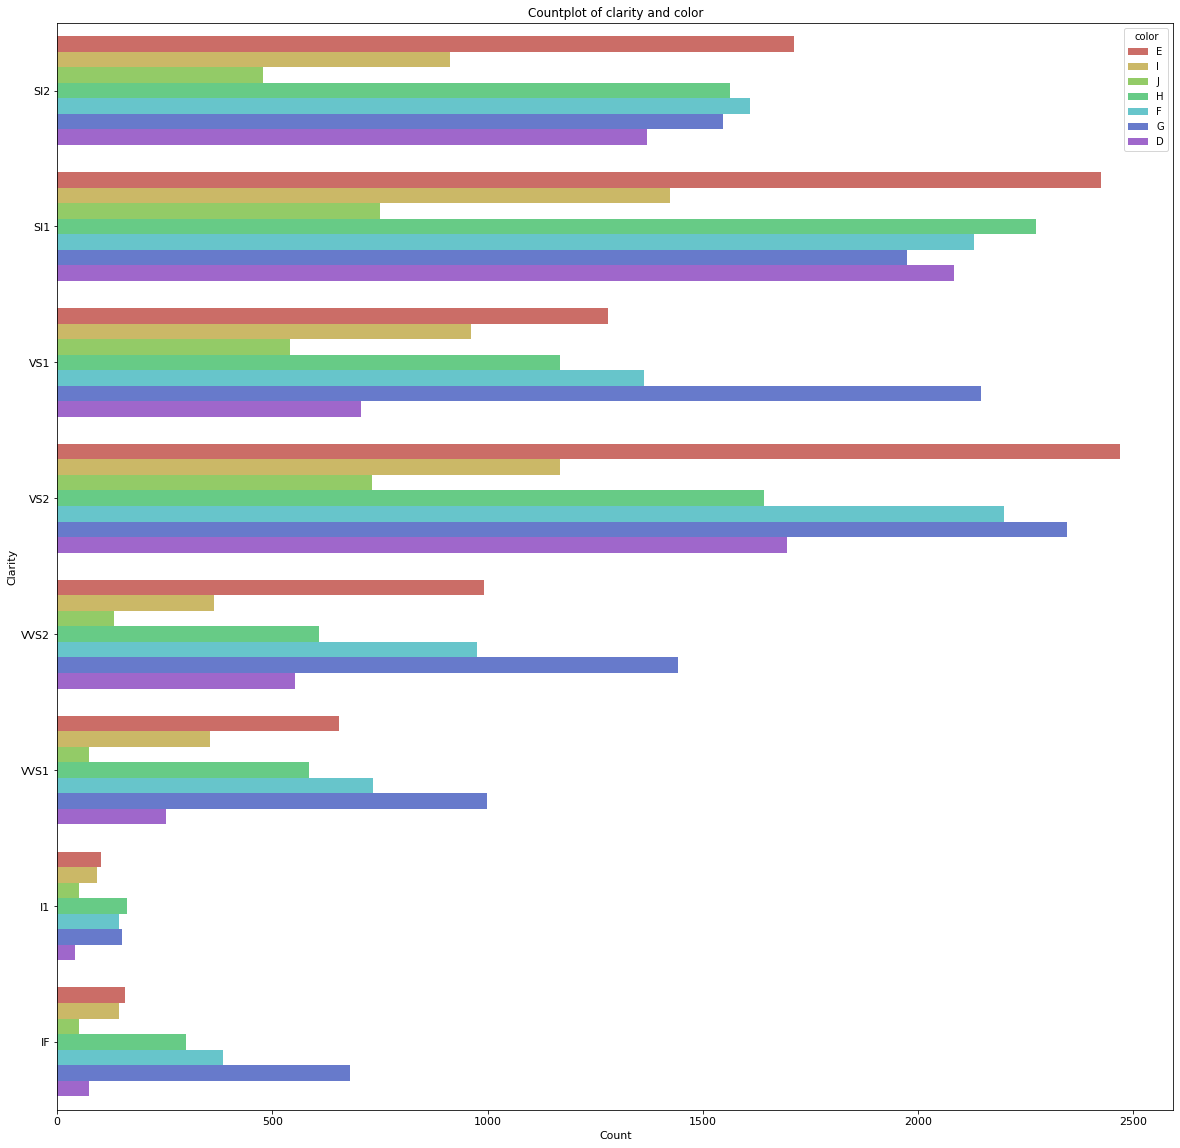

In [15]:
fig_dims = (20,20)
fig, ax = plt.subplots(figsize=fig_dims) 
a = sns.countplot(y="clarity", hue="color", 
                    data=diamonds,ax = ax, palette=sns.color_palette("hls", 8))
a.axes.set_title("Countplot of clarity and color",fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
a.set_ylabel("Clarity",fontsize=11)
a.set_xlabel("Count",fontsize=11);

## 3.4 Distribution Plots

A distribution plot is able to to help us analyze how the target variable is distributed. This type of plot is able to provide us with important insight such as tendency, skewness and others. Moreover, we are able to observe if there are significant outlier that could introduce errors and prepare better.

### Distribution of Price featuring elements of the feature of Diamond colors

Based on the following diagramm, it appears that diamonds with G color are shown to have the highest count with a price around $ 1000, followed by diamonds with color G. 

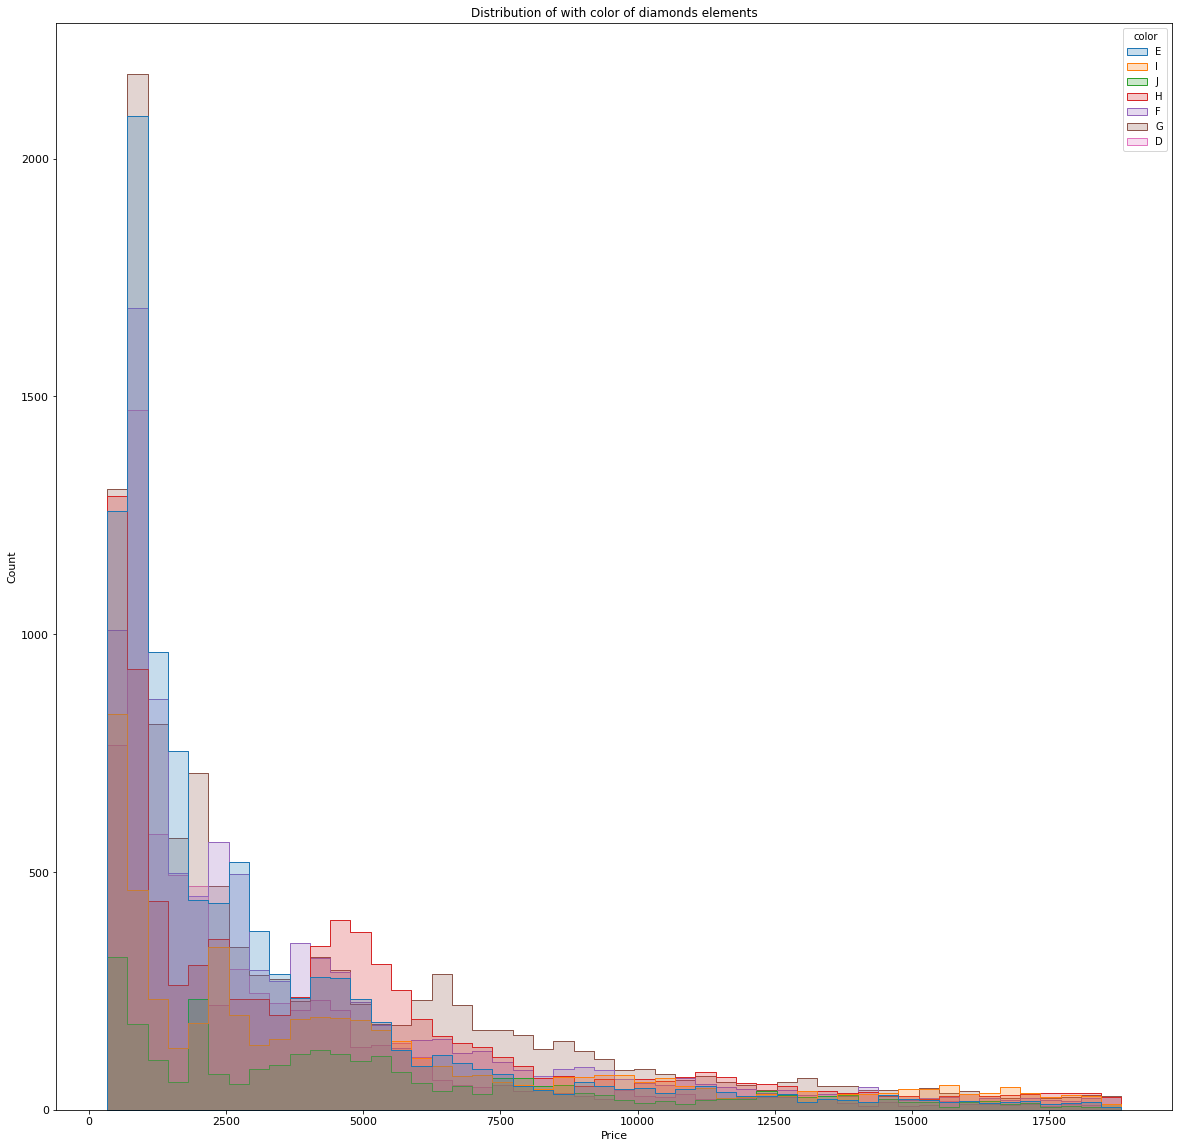

In [16]:
# distribution of price based on the color of the diamond element
fig_dims = (20,20)
fig, ax = plt.subplots(figsize=fig_dims)
a = sns.histplot(diamonds, x="price",hue ="color",element="step", ax= ax, bins=50)
a.axes.set_title("Distribution of with color of diamonds elements",fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
a.set_ylabel("Count",fontsize=11)
a.set_xlabel("Price",fontsize=11);

### Distribution of Price featuring elements of the feature of Diamond cut

Based on the following diagramm, it appears that diamonds with ideal cut are shown to have the highest count with a price around $ 1000. 

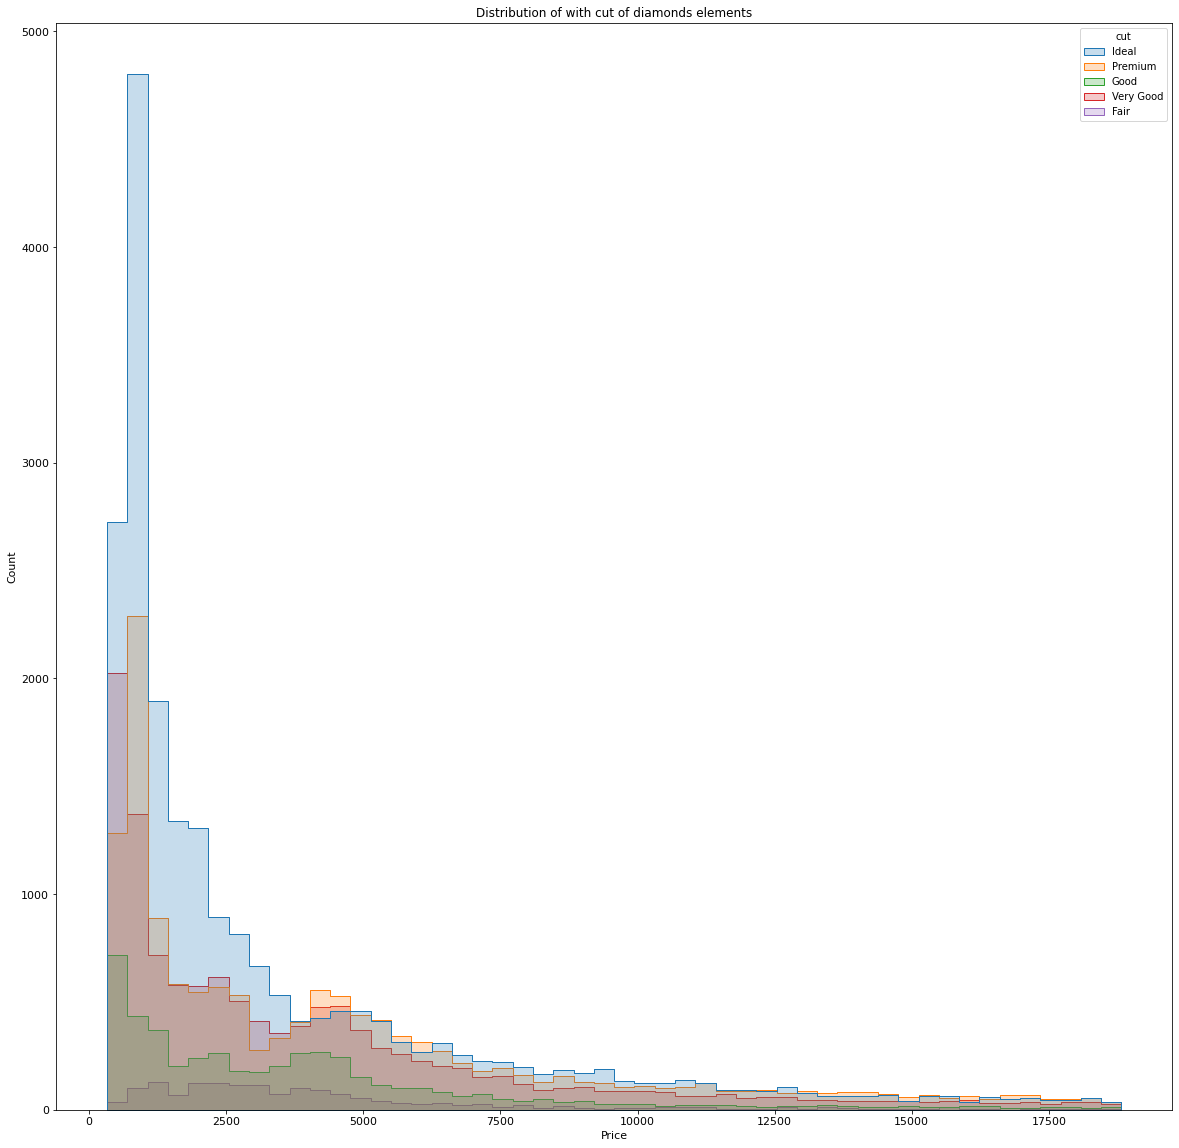

In [17]:
# distribution of price based on the cut of the diamond element
fig_dims = (20,20)
fig, ax = plt.subplots(figsize=fig_dims)
a = sns.histplot(diamonds, x="price",hue ="cut",element="step", ax= ax, bins=50)
a.axes.set_title("Distribution of with cut of diamonds elements",fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
a.set_ylabel("Count",fontsize=11)
a.set_xlabel("Price",fontsize=11);

### Distribution of Price featuring elements of the feature of Diamond clarity

Based on the following diagramm, it appears that diamonds with VS2 clarity are shown to have the highest count with a price around $ 1000. 

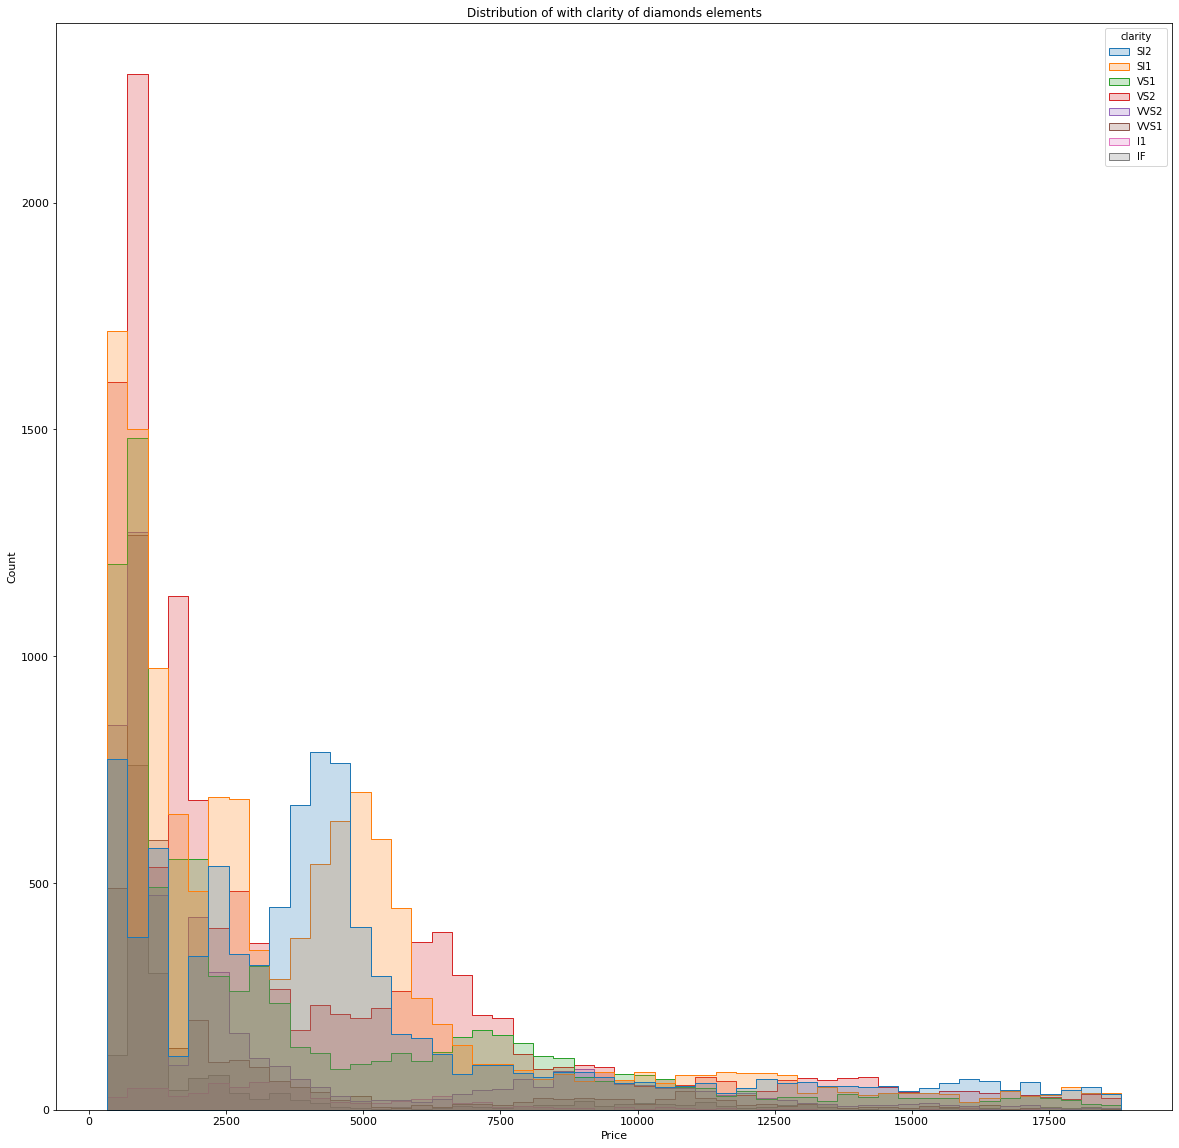

In [18]:
# distribution of price based on the cut of the diamond element
fig_dims = (20,20)
fig, ax = plt.subplots(figsize=fig_dims)
a = sns.histplot(diamonds, x="price",hue ="clarity",element="step", ax= ax, bins=50)
a.axes.set_title("Distribution of with clarity of diamonds elements",fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
a.set_ylabel("Count",fontsize=11)
a.set_xlabel("Price",fontsize=11);

### Distribution of Price featuring a density line

Based on the following diagramm it is evident that there is right skew with regards to price distribution. 

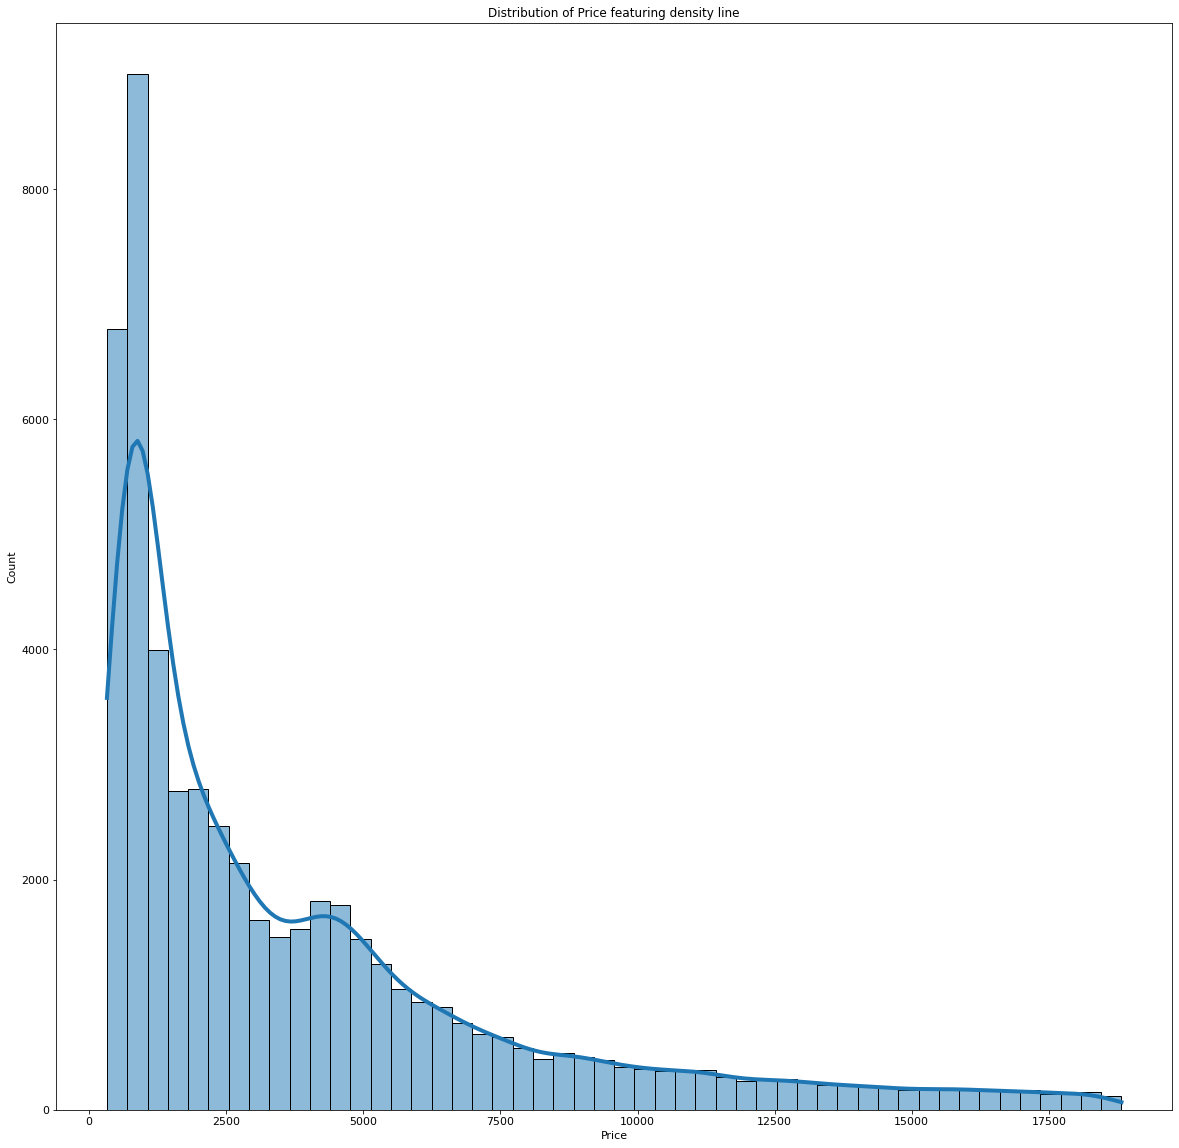

In [19]:
# distribution of price based on the cut of the diamond element
fig_dims = (20,20)
fig, ax = plt.subplots(figsize=fig_dims)
a = sns.histplot(diamonds, x="price",
                 palette = sns.color_palette("husl", 9, 0.1),
                 ax= ax, bins=50, kde = True, 
                 line_kws = {"linewidth":4})
a.axes.set_title("Distribution of Price featuring density line",fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
a.set_ylabel("Count",fontsize=11)
a.set_xlabel("Price",fontsize=11);

# 4. Data Cleaning & Preparation

## 4.1 Dropping Columns

In [20]:
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [21]:
# checking for missing values 
diamonds.isnull().values.any()

False

### Dropping irrelevant columns: 

In [22]:
# "Unnamed: 0" variable is dropped as it is useless as a label.
# "x" variable is dropped since it is used in the variable "Table".
# "y" variable is dropped since it is used in the variable "Table".
#"z" variable is dropped since it is used in the variable "Table".
# dropping the mentioned columns
diamonds.drop(columns=["Unnamed: 0","x","y","z"], inplace=True)
diamonds

,carat,cut,color,clarity,depth,table,price
0,0.23,Ideal,E,SI2,61.5,55.0,326
1,0.21,Premium,E,SI1,59.8,61.0,326
2,0.23,Good,E,VS1,56.9,65.0,327
3,0.29,Premium,I,VS2,62.4,58.0,334
4,0.31,Good,J,SI2,63.3,58.0,335
...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757
53936,0.72,Good,D,SI1,63.1,55.0,2757
53937,0.70,Very Good,D,SI1,62.8,60.0,2757
53938,0.86,Premium,H,SI2,61.0,58.0,2757


## 4.2 Converting Categorical Features to Numbers: One - Hot Encoding 

In [23]:
# one - hot encoding of categorical data
diamonds=pd.get_dummies(diamonds, prefix=['cut', 'color','clarity'])
diamonds

,carat,depth,table,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,0,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


### Correlation Matrix

Now that the data is clean, before we proceed to further modifications in preparations of the model, a correlation matrix will be utilized to show correlations among the various variables in the dataset. 



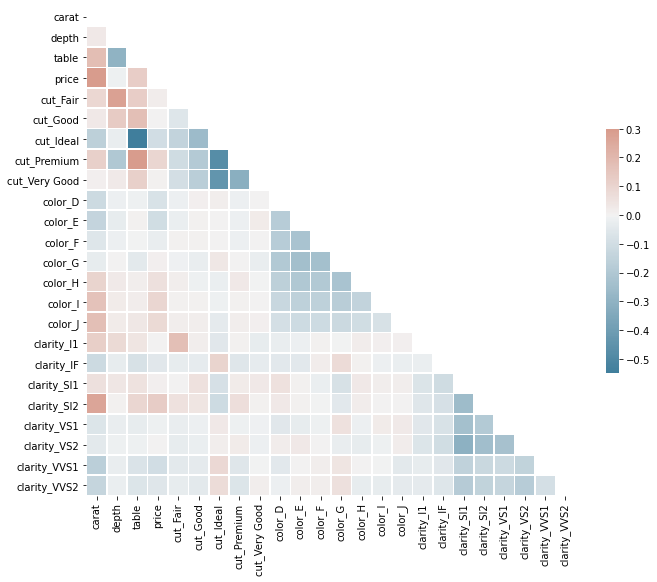

In [24]:
# Compute the correlation matrix
corr = diamonds.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

## 4.3 Generating Target Dataset

A new dataset will be formed containing only the target variable while the column of "price" is dropped from the initial dataset.

In [25]:
# creating a new dataset featuring the value of price
price_tr = diamonds[['price']]
price_tr

,price
0,326
1,326
2,327
3,334
4,335
...,...
53935,2757
53936,2757
53937,2757
53938,2757


In [26]:
# dropping price from the initial dataframe
diamonds.drop(columns=["price"], inplace=True)
diamonds

,carat,depth,table,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## 4.4 Converting "price" column to logarithmic scale

The target variable "price" has been converted to logarithmic scale by using NumPy’s log1p() function. This has been done so that we can use root mean square error as the metric instead of explicitly defining a complex metric RMSLE. (since RMSLE is nothing but RMSE of log values)

In [27]:
# turning the target variable to logarithmic scale
price_tr = np.log1p(price_tr[['price']])
price_tr

,price
0,5.789960
1,5.789960
2,5.793014
3,5.814131
4,5.817111
...,...
53935,7.922261
53936,7.922261
53937,7.922261
53938,7.922261


### Distribution of log(price) featuring a density line 

As it is shown in the following distribution diagram, there is no more positive skew and thus the data are better distributed.

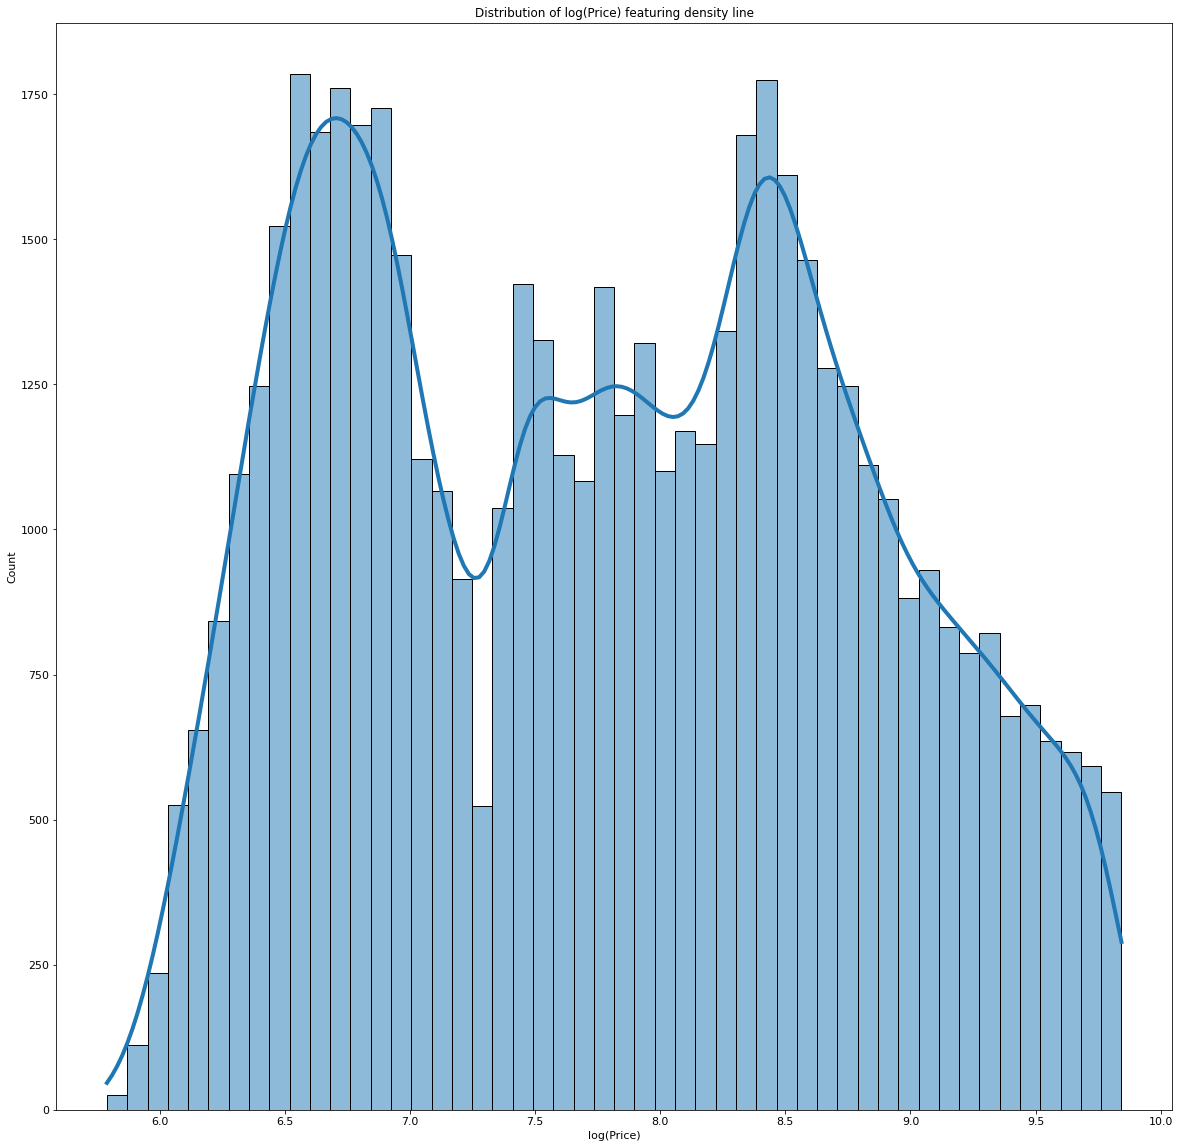

In [28]:
fig_dims = (20,20)
fig, ax = plt.subplots(figsize=fig_dims)
a = sns.histplot(price_tr, x="price",
                 palette = sns.color_palette("husl", 9, 0.1),
                 ax= ax, bins=50, kde = True, 
                 line_kws = {"linewidth":4})
a.axes.set_title("Distribution of log(Price) featuring density line",fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
a.set_ylabel("Count",fontsize=11)
a.set_xlabel("log(Price)",fontsize=11);

## 4.5 Normalizing Numerical Data

In order to utilize the data for further model processing, normalization needs to be implemented. The reason for the utilization of normalization is because of the variety of different scales seen in the data. 

In [29]:
# generating a copy of the dataset to be used for the normalization
scaled_features = diamonds.copy()

# implementing the standard scaler technique to normalize data on the necessary columns
col_names = ['carat', 'depth', 'table']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

diamonds[col_names] = features
diamonds

,carat,depth,table,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.198168,-0.174092,-1.099672,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,-1.240361,-1.360738,1.585529,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,-1.198168,-3.385019,3.375663,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,-1.071587,0.454133,0.242928,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,-1.029394,1.082358,0.242928,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,-0.164427,-0.662711,-0.204605,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,-0.164427,0.942753,-1.099672,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,-0.206621,0.733344,1.137995,0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.130927,-0.523105,0.242928,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## 4.6 Train, Cross-Validation & Test split 

There are going to be two splits of the data. For the purposes of cross validation (cv), the data will be split into training, cv and testing data. The ratio that was chosen is 80:20. The training data will be used to train the model and the cv data will be used to validate them. Finally, the testing data will be used for testing the finallized optimised model. 

In [30]:
# splitting the data into training and testing data
diamtraindf, diam_test_df , pricetrain, price_test = train_test_split(diamonds, price_tr, test_size=0.2, random_state=42)
print('First train size: {}, Test size: {}' .format(diamtraindf.shape, diam_test_df.shape))

# splitting the training data further into cross_validation and the final training data
diamtraindf, diam_cv_df , pricetrain, price_cv = train_test_split(diamtraindf, pricetrain, test_size=0.2, random_state=42)
print('Final train size: {}, Cross Validation size: {}' .format(diamtraindf.shape, diam_cv_df.shape))

First train size: (43152, 23), Test size: (10788, 23)
Final train size: (34521, 23), Cross Validation size: (8631, 23)


# 5. Modelling - Machine Learning Models

As a measure of success of the models, the RMSLE will be utilized. The reason for this is in order to minimize the effects of outliers.

### RMSLE 

Root Mean Squared Logarithmic Error (RMSLE) is a measure of showcasing how successful a prediction model is. It computes the difference between the logarithms of the predicted and the actual values of a machine learning model. 

As a metric, the smaller the RMSLE value the better the model.

## 5.1 Lasso Regression

Least Absolute Shrinkage and Selection Operator Regression (Lasso Regression), is a regularized version of Linear Regression. The model utilizes a regularization term to the cost function while featuring the l1 to the norm of the weight vector.

The lasso regression tends to eliminate the weight of the least important features. This means that it does feature selection and returns only few of the elements with a coefficient different from 0.

  0%|          | 0/3 [00:00<?, ?it/s]<ipython-input-31-c8116487120b>:11: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(diamtraindf, pricetrain)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1970.3085835803663, tolerance: 3.5509089462465173
  model = cd_fast.enet_coordinate_descent(
100%|██████████| 3/3 [00:28<00:00,  9.58s/it]

RMSLE in training data for alpha =  0 is 0.3378628479894446
RMSLE in cv data for alpha =  0 is 0.3374066431414328
RMSLE in training data for alpha =  1e-08 is 0.33786284815622625
RMSLE in cv data for alpha =  1e-08 is 0.3374065539015892
RMSLE in training data for alpha =  1 is 1.0142104572863508
RMSLE in cv data for alpha =  1 is 1.0124582232000232


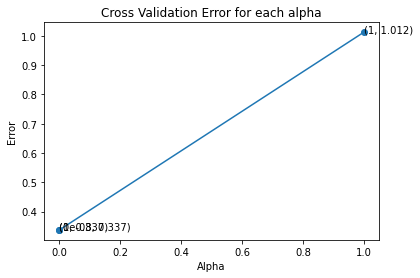

In [31]:
# setting up three alhpa values to check the RMSLE, 0 is chosen in order to see what happens without regularization.
alpha_lasso = [0, 1e-8, 1]

# creating lists that will be filled with the RMSLE values
tr_lasso_rmsle=[]
cv_lasso_rmsle = []

# for loop running the lasso for the different alphas
for i in tqdm(alpha_lasso):
    lasso = Lasso(alpha=i, normalize=True, max_iter=100000)
    lasso.fit(diamtraindf, pricetrain)
    tr_preds_diam = lasso.predict(diamtraindf)
    cv_preds_diam = lasso.predict(diam_cv_df)
    tr_lasso_rmsle.append(sqrt(mse(pricetrain, tr_preds_diam)))
    cv_lasso_rmsle.append(sqrt(mse(price_cv, cv_preds_diam)))

# generating the RMSLE values for each case    
for i in range(len(cv_lasso_rmsle)):
    print ('RMSLE in training data for alpha = ',alpha_lasso[i],'is',tr_lasso_rmsle[i])
    print ('RMSLE in cv data for alpha = ',alpha_lasso[i],'is',cv_lasso_rmsle[i])
    
# creating a plot featuring the different values of the RMSLE and the alpha for cv data.
fig, ax = plt.subplots()
ax.plot(alpha_lasso, cv_lasso_rmsle)
ax.scatter(alpha_lasso, cv_lasso_rmsle)
for i, txt in enumerate(np.round(cv_lasso_rmsle,3)):
    ax.annotate((alpha_lasso[i],np.round(txt,3)), (alpha_lasso[i],cv_lasso_rmsle[i]))

plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha")
plt.ylabel("Error")
plt.show();    

Firstly, the results of the RMSLE on both the training and cv data do not differ that much. Moreover, it seems that very small regularization or none at all gives better results. This in turn mean that a linear regression model would fit better to the data rather than a lasso regression.

## 5.2 Random Forrest Regression

Random forrest regression is a powerful regression tool that uses an ensemble of decision trees that are trained using bagging as a method. 

In [32]:
# the model expects a 1d array 
y = np.ravel(pricetrain)

# implementation of the regressor
rfr = RandomForestRegressor(n_estimators = 1000, random_state = 42) 
rfr.fit(diamtraindf, y)
rfr_tr_preds_diam = rfr.predict(diamtraindf)
rfr_cv_preds_diam = rfr.predict(diam_cv_df)

# finding the RMSLE values for both the training and cv data
tr_rmsle = sqrt(mse(pricetrain, rfr_tr_preds_diam))
cv_rmsle = sqrt(mse(price_cv, rfr_cv_preds_diam))

print ('RMSLE in training data is', tr_rmsle)
print ('RMSLE in cv data is', cv_rmsle)

RandomForestRegressor(n_estimators=1000, random_state=42)

RMSLE in training data is 0.04939930615844925
RMSLE in cv data is 0.1109793564946567


## 5.3 Support Vector Machine Regression (SVR)

Support Vector Machine Regression is a very popular model used both for regression and classification tasks. The main idea behind it is that a decision "safe" boundary is generated. In classification tasks not only does the decision boundary separate the classes but it also stays as far away from the closest training set as possible.

In regression tasks the model tries to fit as many instances as it is possible on the street while limiting margin violations. Kernels can be used faturing lineral, polynomial or other characteristics.

In [33]:
# setting up the models. A polynomial kernel will be used of 2 degree while the C value is set to 1.
svr = SVR(kernel = 'poly', degree = 2, C=0.1, epsilon=0.1, max_iter=100000)
svr.fit(diamtraindf, np.ravel(pricetrain))
svr_preds_tr = svr.predict(diamtraindf)
svr_preds_cv = svr.predict(diam_cv_df)

# finding the RMSLE values for both the training and cv data
svr_tr_rmsle = sqrt(mse(pricetrain, svr_preds_tr))
svr_cv_rmsle = sqrt(mse(price_cv, svr_preds_cv))

print('RMSLE in training data is', svr_tr_rmsle)
print('RMSLE in cv data is', svr_cv_rmsle)

SVR(C=0.1, degree=2, kernel='poly', max_iter=100000)

RMSLE in training data is 0.1630204131222506
RMSLE in cv data is 0.166705961050248


## 5.4 Gradient Tree Boosting

The model works by featuring an enslemble of weaker models. Each preceeding model is correcting its predecessor. The method is attempting to fit the new predictor to the residual errors of the previous predictor.  

The package used for the process will xgboost due to its speed and mobility

In [34]:
#There can be different models of predictor, in this case decision trees will be used as the basic predictors. 
# creating an xgbmatrix from the dataset to be used in the model
diam_matrix = xgb.DMatrix(data=diamonds,label=price_tr)

#setting up the model featuring decision trees as the predictors
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 100, alpha = 0.1, n_estimators = 10000)
xg_reg.fit(diamtraindf,pricetrain)
xgb_tr_preds = xg_reg.predict(diamtraindf)
xgb_cv_preds = xg_reg.predict(diam_cv_df)

# finding the RMSLE value for both training and CV data
xgb_tr_rmsle = sqrt(mse(pricetrain, xgb_tr_preds))
xgb_cv_rmsle = sqrt(mse(price_cv, xgb_cv_preds))

print('RMSLE in training data is', xgb_tr_rmsle)
print('RMSLE in cv data is', xgb_cv_rmsle)

[11:08:41] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[11:09:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=0.1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=100,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10000, n_jobs=0, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0.100000001,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

RMSLE in training data is 0.047028804281629887
RMSLE in cv data is 0.11435237171792165


## 5.5 Artificial Neural Network (ANN)

An artificial neural network is neural network consisting of several perceptors. They are divided into three parts;
* The input layer (that receives the data as inputs)
* The hidden layer (that processes the inputs)
* The output layer (that delivers the result)

Through the process each layer is attempting to form a relationship with regards to the weights of the variables.

In [35]:
from keras.layers import Input, Dense, Concatenate
from keras.models import Model
# forming the input layers  
input_tensor_1 = Input(shape=1,)
input_tensor_2 = Input(shape=1,)
input_tensor_3 = Input(shape=1,)
input_tensor_4_cut = Input(shape=5,)
input_tensor_5_col = Input(shape=7,)
input_tensor_6_cl = Input(shape=8,)

# forming the wanted output layer, since we want to only receive the prediction about price, the value for Dense() is 1
out_tensor = Concatenate()([input_tensor_1,input_tensor_2,input_tensor_3,input_tensor_4_cut,input_tensor_5_col,input_tensor_6_cl])
out_tensor = Dense(1)(out_tensor)

# setting up the model
model = Model([input_tensor_1,input_tensor_2,
               input_tensor_3,input_tensor_4_cut,
               input_tensor_5_col,input_tensor_6_cl],out_tensor)

# compiling the model
model.compile(loss='mean_squared_error', optimizer = 'adam')

#fitting and evaluating the model
model.fit([diamtraindf['carat'],diamtraindf['depth'],
            diamtraindf['table'],diamtraindf[['cut_Fair','cut_Good','cut_Ideal','cut_Premium','cut_Fair']],
            diamtraindf[['color_D','color_E','color_F','color_G','color_H','color_I','color_J']],
            diamtraindf[['clarity_I1','clarity_IF','clarity_SI1','clarity_SI2','clarity_VS1','clarity_VS2',
                        'clarity_VVS1','clarity_VVS2']]],pricetrain['price'], epochs =150, batch_size = 10)  

RMSLE_tr = model.evaluate([diamtraindf['carat'],diamtraindf['depth'],
            diamtraindf['table'],diamtraindf[['cut_Fair','cut_Good','cut_Ideal','cut_Premium','cut_Fair']],
            diamtraindf[['color_D','color_E','color_F','color_G','color_H','color_I','color_J']],
            diamtraindf[['clarity_I1','clarity_IF','clarity_SI1','clarity_SI2','clarity_VS1','clarity_VS2',
                        'clarity_VVS1','clarity_VVS2']]],pricetrain['price'])  

RMSLE_cv = model.evaluate([diam_cv_df['carat'],diam_cv_df['depth'],
            diam_cv_df['table'],diam_cv_df[['cut_Fair','cut_Good','cut_Ideal','cut_Premium','cut_Fair']],
            diam_cv_df[['color_D','color_E','color_F','color_G','color_H','color_I','color_J']],
            diam_cv_df[['clarity_I1','clarity_IF','clarity_SI1','clarity_SI2','clarity_VS1','clarity_VS2',
                        'clarity_VVS1','clarity_VVS2']]],price_cv['price'])


print('RMSLE in training data is', RMSLE_tr)
print('RMSLE in cv data is', RMSLE_cv)

Epoch 1/150
3453/3453 [==============================] - 2s 428us/step - loss: 33.2074
Epoch 2/150
3453/3453 [==============================] - 1s 427us/step - loss: 0.8499
Epoch 3/150
3453/3453 [==============================] - 1s 427us/step - loss: 0.2556
Epoch 4/150
3453/3453 [==============================] - 1s 430us/step - loss: 0.1179
Epoch 5/150
3453/3453 [==============================] - 1s 431us/step - loss: 0.1123
Epoch 6/150
3453/3453 [==============================] - 1s 429us/step - loss: 0.1108
Epoch 7/150
3453/3453 [==============================] - 1s 428us/step - loss: 0.1144
Epoch 8/150
3453/3453 [==============================] - 1s 430us/step - loss: 0.1129
Epoch 9/150
3453/3453 [==============================] - 1s 429us/step - loss: 0.1173
Epoch 10/150
3453/3453 [==============================] - 1s 429us/step - loss: 0.1187
Epoch 11/150
3453/3453 [==============================] - 1s 428us/step - loss: 0.1169
Epoch 12/150
3453/3453 [===========================

3453/3453 [==============================] - 1s 418us/step - loss: 0.1141
Epoch 96/150
3453/3453 [==============================] - 1s 418us/step - loss: 0.1119
Epoch 97/150
3453/3453 [==============================] - 1s 420us/step - loss: 0.1176
Epoch 98/150
3453/3453 [==============================] - 1s 419us/step - loss: 0.1186
Epoch 99/150
3453/3453 [==============================] - 1s 420us/step - loss: 0.1117
Epoch 100/150
3453/3453 [==============================] - 1s 416us/step - loss: 0.1113
Epoch 101/150
3453/3453 [==============================] - 1s 420us/step - loss: 0.1139
Epoch 102/150
3453/3453 [==============================] - 1s 421us/step - loss: 0.1144
Epoch 103/150
3453/3453 [==============================] - 1s 421us/step - loss: 0.1126
Epoch 104/150
3453/3453 [==============================] - 1s 421us/step - loss: 0.1144
Epoch 105/150
3453/3453 [==============================] - 1s 418us/step - loss: 0.1160
Epoch 106/150
3453/3453 [=========================

270/270 [==============================] - 0s 406us/step - loss: 0.1142
RMSLE in training data is 0.11465342342853546
RMSLE in cv data is 0.11424564570188522


In [36]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________

Following the results, it is evident that the model does not possess so many trainable parameters. It is 23 parameters that were used as an input and one more bias parameter. The parameters are all gathered only in the dense which is natural since we only have one target value. Due to its lack of versatility, the model is less prone to overfitting.

# 6. Fine Tuning

Fine tuning is the process of attempting to better a model via changing its hyperparameters. Due to time constraints, only two of the previous models will be chosen for fine tuning based on their RMSLE values on the cross validation data. 

In [37]:
# Out of the previous models, only the three with the lowest RSMLE values are shown. 
print ('Random Forrest Regression RMSLE in cv data is', cv_rmsle)
print('Gradient Tree Boosting RMSLE in cv data is', xgb_cv_rmsle)
print('AAN RMSLE in cv data is', RMSLE_cv)

Random Forrest Regression RMSLE in cv data is 0.1109793564946567
Gradient Tree Boosting RMSLE in cv data is 0.11435237171792165
AAN RMSLE in cv data is 0.11424564570188522


The models that will be fine tuned are the **Random Forrest Regressor** and **Gradient Tree Boosting**, due to their similar nature.

 ## 6.1 Random Forest Regressor

In [38]:
# Attempting to optimise the random forest regressor by implementing Randomized Search CV.
# setting up the parameters
#Takes 2 hrs to compute!
n_estimators = [1500, 5000]
max_depth = [20,30,40]
max_depth.append(None)
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,5]

# setting up a dictionnairy with the parameters
grid_param = {'n_estimators': n_estimators,
             'max_depth': max_depth,
             'min_samples_split': min_samples_split,
             'min_samples_leaf': min_samples_leaf}

# setting up the randomized search
rfor = RandomForestRegressor(random_state=1)
rfor_random = RandomizedSearchCV(estimator = rfor,
                                param_distributions = grid_param, n_iter = 500,
                                cv = 3, verbose = 2, random_state = 42,
                                n_jobs =-1)

# fitting the training data and printing the best parameters
rfor_random.fit(diamtraindf, y)
print(rfor_random.best_params_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 72 is smaller than n_iter=500. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1),
                   n_iter=500, n_jobs=-1,
                   param_distributions={'max_depth': [20, 30, 40, None],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [1500, 5000]},
                   random_state=42, verbose=2)

{'n_estimators': 5000, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 20}


In [39]:
# Running the Regressor again with the new parameters.
# implementation of the regressor
rfr = RandomForestRegressor(n_estimators = 5000, min_samples_split = 10, min_samples_leaf = 1, 
                            max_depth =20,  random_state = 42) 
#fitting
rfr.fit(diamtraindf, y)

#predicting for the 3 datasets
rfr_tr_preds_diam = rfr.predict(diamtraindf)
rfr_cv_preds_diam = rfr.predict(diam_cv_df)
rfr_tst_preds_diam =  rfr.predict(diam_test_df)

# finding the RMSLE values for the training, cv and testing data
tr_rmsle = sqrt(mse(pricetrain, rfr_tr_preds_diam))
cv_rmsle = sqrt(mse(price_cv, rfr_cv_preds_diam))
tst_rmsle = sqrt(mse(price_test,rfr_tst_preds_diam))

print ('RMSLE in training data is', tr_rmsle)
print ('RMSLE in cv data is', cv_rmsle)
print ('RMSLE in test data is', tst_rmsle)

RandomForestRegressor(max_depth=20, min_samples_split=10, n_estimators=5000,
                      random_state=42)

RMSLE in training data is 0.07376305197284481
RMSLE in cv data is 0.10417925316631438
RMSLE in test data is 0.10320076861869301


## 6.2 Gradient Tree Boosting

Attempting to optimise the gradient tree boosting by implementing a grid search CV to compute the best learning rate and then a randomized search cv for the rest of the parameters.

In [49]:
#setting up the learning rate parameter
xgb1 = xgb.XGBRegressor()
parameters = {'learning_rate': [0.1,0.25,0.5,0.75,1]}

#setting up the grid search
xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs=None,
                        verbose=True)

#fitting the data
xgb_grid.fit(diamtraindf,pricetrain)

print(xgb_grid.best_params_)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

{'learning_rate': 0.25}


In [52]:
# setting up the second set of parameters
xgb_parameters_2 = {
    'max_depth': [2,4,6,8,10],
    'min_child_weight' : [1, 3, 5, 7],
    'gamma': [0.1, 0.3, 0.5]
}

# setting up the randomized search with the best learning rate 
xgb_random = RandomizedSearchCV(estimator = xgb.XGBRegressor(learning_rate = 0.25, n_estimators = 1000),
                                param_distributions = xgb_parameters_2, n_iter = 60,
                                cv = 3, verbose = 2, random_state = 42,
                                n_jobs=None)

#fitting the data
xgb_random.fit(diamtraindf, y)
print(xgb_random.best_params_)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV] END .........gamma=0.1, max_depth=2, min_child_weight=1; total time=   1.8s
[CV] END .........gamma=0.1, max_depth=2, min_child_weight=1; total time=   1.8s
[CV] END .........gamma=0.1, max_depth=2, min_child_weight=1; total time=   1.6s
[CV] END .........gamma=0.1, max_depth=2, min_child_weight=3; total time=   1.6s
[CV] END .........gamma=0.1, max_depth=2, min_child_weight=3; total time=   1.7s
[CV] END .........gamma=0.1, max_depth=2, min_child_weight=3; total time=   1.9s
[CV] END .........gamma=0.1, max_depth=2, min_child_weight=5; total time=   2.0s
[CV] END .........gamma=0.1, max_depth=2, min_child_weight=5; total time=   2.1s
[CV] END .........gamma=0.1, max_depth=2, min_child_weight=5; total time=   2.3s
[CV] END .........gamma=0.1, max_depth=2, min_child_weight=7; total time=   2.0s
[CV] END .........gamma=0.1, max_depth=2, min_child_weight=7; total time=   2.0s
[CV] END .........gamma=0.1, max_depth=2, min_c

[CV] END .........gamma=0.3, max_depth=8, min_child_weight=3; total time=   9.1s
[CV] END .........gamma=0.3, max_depth=8, min_child_weight=5; total time=   9.1s
[CV] END .........gamma=0.3, max_depth=8, min_child_weight=5; total time=   8.3s
[CV] END .........gamma=0.3, max_depth=8, min_child_weight=5; total time=   9.9s
[CV] END .........gamma=0.3, max_depth=8, min_child_weight=7; total time=  10.7s
[CV] END .........gamma=0.3, max_depth=8, min_child_weight=7; total time=   9.2s
[CV] END .........gamma=0.3, max_depth=8, min_child_weight=7; total time=   9.2s
[CV] END ........gamma=0.3, max_depth=10, min_child_weight=1; total time=  13.6s
[CV] END ........gamma=0.3, max_depth=10, min_child_weight=1; total time=  12.6s
[CV] END ........gamma=0.3, max_depth=10, min_child_weight=1; total time=  12.8s
[CV] END ........gamma=0.3, max_depth=10, min_child_weight=3; total time=  11.6s
[CV] END ........gamma=0.3, max_depth=10, min_child_weight=3; total time=  12.9s
[CV] END ........gamma=0.3, 

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=0.25,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=1000, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, reg_alpha=None,
                                      

{'min_child_weight': 7, 'max_depth': 10, 'gamma': 0.1}


In [53]:
# Running the Boosting again featuring the new parameters
# creating an xgbmatrix from the dataset to be used in the model
diam_matrix = xgb.DMatrix(data=diamonds,label=price_tr)

#setting up the model featuring decision trees as the predictors
xg_reg = xgb.XGBRegressor(objective ='reg:linear', min_child_weight = 7, learning_rate = 0.25,
                max_depth = 10, gamma = 0.1, n_estimators = 1000)
xg_reg.fit(diamtraindf,pricetrain)

#predicting for the 3 datasets
xgb_tr_preds = xg_reg.predict(diamtraindf)
xgb_cv_preds = xg_reg.predict(diam_cv_df)
xgb_tst_preds= xg_reg.predict(diam_test_df)

# finding the RMSLE values for the training, cv and testing data
xgb_tr_rmsle = sqrt(mse(pricetrain, xgb_tr_preds))
xgb_cv_rmsle = sqrt(mse(price_cv, xgb_cv_preds))
xgb_tst_rmsle = sqrt(mse(price_test,xgb_tst_preds))

print('RMSLE in training data is', xgb_tr_rmsle)
print('RMSLE in cv data is', xgb_cv_rmsle)
print('RMSLE in test data is', xgb_tst_rmsle)

[13:22:53] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[13:23:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.25, max_delta_step=0, max_depth=10,
             min_child_weight=7, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

RMSLE in training data is 0.09334518362950696
RMSLE in cv data is 0.09973533806647854
RMSLE in test data is 0.10046717411633445


# 7. Conclusion

Based on the previous section and after the fine tuning, it is evident that the best model to be used for the prediction of price is that of Gradient Tree Boosting. The steady values of the RMSLE across the division of the dataset into training, cross-validation and test data showcased that. Moreover, the RMSLE value is the lowest across all the models with an approximate value of 0.099 showcasing reliability and stability for the model.

## 7.1 Limitations

While the dataset provided us with the effect that physical characteristics have on diamonds, there are also other variables affecting their price. For instance, the season of the year can have an effect. Also, as mentioned previously during the past years there have been flactuations in the price due to lack of interest in the market. Especially at the time of the golbal pandemic when buying habits have decreased, demand for diamonds has decreased. These sort of fluctuations cannot be measured or predicted as they are considered as unforeseen circumstances.

A proposal for future research, would be to attempt to associate season ages as well with diamond prices.

Link to jupyter notebook: https://liveuclac-my.sharepoint.com/:f:/g/personal/uceipet_ucl_ac_uk/EsRzjXDz3xpCvkR5dR7ywrMBuxbZtbhBriy9y9-0_4bIkQ?e=hygy0o

# 8. References

[1] DataCamp. 2021. Using XGBoost in Python.[online] Available at: <https://www.datacamp.com/community/tutorials/xgboost-in-python> [Accessed 8 March 2021].

[2] GitHub. 2021. ageron/handson-ml. [online] Available at: https://github.com/ageron/handson-ml/blob/master/02_end_to_end_machine_learning_project.ipynb [Accessed 5 March 2021].

[3] Medium. 2021. Price Prediction using Machine Learning Regression — a case study. [online] Available at: <https://towardsdatascience.com/mercari-price-suggestion-97ff15840dbd> [Accessed 4 March 2021].

[4] Medium. 2021. Random Forest: Hyperparameters and how to fine-tune them. [online] Available at: <https://towardsdatascience.com/random-forest-hyperparameters-and-how-to-fine-tune-them-17aee785ee0d> [Accessed 6 March 2021].

[5] Medium. 2021. Regularization in Machine Learning. [online] Available at: <https://towardsdatascience.com/regularization-in-machine-learning-76441ddcf99a> [Accessed 6 March 2021].

[6] Medium. 2021. XGBoost Python Example. [online] Available at: <https://towardsdatascience.com/xgboost-python-example-42777d01001e> [Accessed 6 March 2021].

[7] Medium. 2021. What is the Significance of C value in Support Vector Machine?. [online] Available at: <https://medium.com/@pushkarmandot/what-is-the-significance-of-c-value-in-support-vector-machine-28224e852c5a> [Accessed 6 March 2021].

